<a href="https://colab.research.google.com/github/mayaah-karolaine/tt3-orf-extractor/blob/main/MpGenomaSARScOV10_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAPA  COM AS COORDENADAS DO GENOMA SARS CoV-2

In [ ]:
#importando blibliotecas para utilizar as funções.
import pandas as pd
import json
import matplotlib.pyplot as plt


In [ ]:
#Filtrando dataset e add uma nova coluna com informação extra.
import pandas as pd

sars = {'orf_s': ['1A','1AB','SPIKE','3A', '4', '5', '6', '7A','7B', '8', '9','10'],
        'Start' : [266, 13483, 21563, 25393, 26245, 26523, 27202, 27394, 27756, 27894, 28281, 29565],
        'End' : [13483, 21555, 25384, 26220, 26472, 27191, 27387, 27759, 27887, 28262, 29540, 29681]
        }
df = pd.DataFrame.from_dict(sars)
df['length'] = df['End'] - df['Start']
print(df)

    orf_s  Start    End  length
0      1A    266  13483   13217
1     1AB  13483  21555    8072
2   SPIKE  21563  25384    3821
3      3A  25393  26220     827
4       4  26245  26472     227
5       5  26523  27191     668
6       6  27202  27387     185
7      7A  27394  27759     365
8      7B  27756  27887     131
9       8  27894  28262     368
10      9  28281  29540    1259
11     10  29565  29681     116


In [ ]:
# Chamando o arquivo contendo todos os genomas ref que alinharam com os primers
import pandas as pd
df = pd.read_csv('/content/sample_data/out_all.csv')
print(df)
df = df[df['genoma_ref'] == 'ON874956.1 '].drop_duplicates(subset=['nome_primer', 'primer'])

df.to_csv('out_all_filtered.csv', index=False)


        genoma_ref nome_primer    End  Start  primer
0      ON875358.1         LEFT      6     29       1
1      ON875359.1         LEFT      6     29       1
2      ON875360.1         LEFT      6     29       1
3      ON875361.1         LEFT      6     29       1
4      ON875362.1         LEFT      6     29       1
...            ...         ...    ...    ...     ...
10895  ON880624.1        RIGHT  29767  29738      98
10896  ON880626.1        RIGHT  29767  29738      98
10897  ON880627.1        RIGHT  29355  29326      98
10898  ON880628.1        RIGHT  29370  29341      98
10899  ON880630.1        RIGHT  29395  29366      98

[10900 rows x 5 columns]


In [ ]:
#criando um csv vazio e nomeando de ORFsars.csv
import csv
f = open("Orfsars.csv", "x")

In [ ]:
#Add e writing um dataframe com as coordenadas das ORFs presente no genoma de SARS-CoV-2
import pandas as pd

categorias = ['Name', 'Inicio', 'Fim', 'Length']

# Info nas linhas (rows) do arquivo csv
rows = [['ORF1a', '266', '13483', '13217'],
        ['ORF1ab', '13483', '21555', '8072'],
        ['SPIKE', '21563' , '25384', '3821'],
        ['ORF3a', '25393', '26220', ' 827'],
        ['ORF4', '26245', '26472', '227'],
        ['ORF 5', '26523', '27191', '668'],
        ['ORF 6', '27202', '27387', '185'],
        ['ORF 7a', '27394', '27759', '365'],
        ['ORF 7b', '27756', '27887', '131'],
        ['ORF 8', '27894', '28262', '368'],
        ['ORF 9', '28281', '29540', '1259'],
        ['ORF 10', '29565', '29681', '116']]

df = pd.DataFrame(rows, columns = categorias)
df.to_csv('Orfsars.csv', index=False)



# Criação do mapa

In [ ]:
# Abrindo arquivos altualizados csv e
import pandas as pd

df = pd.read_csv('Orfsars.csv')
df_primer = pd.read_csv('out_all_filtered.csv')

df_primer['start_end'] = df_primer.apply(lambda row: f"{str(row['Start'])} - {str(row['End'])}", axis=1)
df_primer_right = df_primer[(df_primer['nome_primer'] == 'RIGHT') & (df_primer['genoma_ref'] == 'ON874956.1 ')]
df_primer_left = df_primer[(df_primer['nome_primer'] == 'LEFT')  & (df_primer['genoma_ref'] == 'ON874956.1 ')]

df_primer


,genoma_ref,nome_primer,End,Start,primer,start_end
0,ON874956.1,RIGHT,360,336,1,336 - 360
1,ON874956.1,LEFT,271,292,2,292 - 271
2,ON874956.1,RIGHT,667,646,2,646 - 667
3,ON874956.1,LEFT,593,614,3,614 - 593
4,ON874956.1,RIGHT,969,946,3,946 - 969
...,...,...,...,...,...,...
180,ON874956.1,RIGHT,28971,28950,95,28950 - 28971
181,ON874956.1,LEFT,28894,28915,96,28915 - 28894
182,ON874956.1,RIGHT,29286,29265,96,29265 - 29286
183,ON874956.1,LEFT,29197,29224,97,29224 - 29197


In [ ]:
%pip install bioframe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 2.2 MB/s eta 0:00:00


In [ ]:
df_primer_left[df_primer_left['primer'] == 50]

,genoma_ref,nome_primer,End,Start,primer,start_end
95,ON874956.1,LEFT,14798,14827,50,14827 - 14798


In [ ]:
df_join = df_primer_right\
  .drop_duplicates(subset=['nome_primer', 'primer'])\
  .merge(
      df_primer_left\
       .drop_duplicates(subset=['nome_primer', 'primer'])\
       .rename(columns={'Start': 'l_Start', 'End': 'l_End'})[['primer', 'l_Start', 'l_End']],
      on='primer', how='outer')

In [ ]:
df_join.dropna()

,genoma_ref,nome_primer,End,Start,primer,start_end,l_Start,l_End
1,ON874956.1,RIGHT,667.0,646.0,2,646 - 667,292.0,271.0
2,ON874956.1,RIGHT,969.0,946.0,3,946 - 969,614.0,593.0
3,ON874956.1,RIGHT,1278.0,1254.0,4,1254 - 1278,906.0,885.0
4,ON874956.1,RIGHT,1592.0,1565.0,5,1565 - 1592,1205.0,1184.0
5,ON874956.1,RIGHT,1905.0,1884.0,6,1884 - 1905,1536.0,1515.0
...,...,...,...,...,...,...,...,...
89,ON874956.1,RIGHT,28372.0,28351.0,93,28351 - 28372,28021.0,27999.0
90,ON874956.1,RIGHT,28687.0,28665.0,94,28665 - 28687,28324.0,28303.0
91,ON874956.1,RIGHT,28971.0,28950.0,95,28950 - 28971,28607.0,28586.0
92,ON874956.1,RIGHT,29286.0,29265.0,96,29265 - 29286,28915.0,28894.0


In [ ]:
colors = (['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'brown'] * 100)[:88]



Text(0.5, 1.0, 'primer')

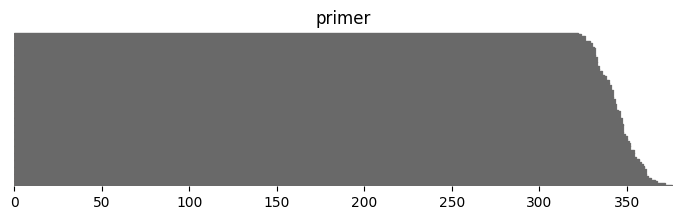

In [ ]:
import itertools

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import bioframe as bf
import bioframe.vis

#df_primer_bf = df_primer[df_primer['genoma_ref'] == 'ON874956.1 ']
df_join['end'] = df_join['Start'] - df_join['l_Start']
df_join['start'] = 0
#df_primer_bf = df_primer_bf.rename(columns={'primer': 'chrom', 'Start': 'start', 'End': 'end'})
df_join['chrom'] = '1'
#df_primer_bf = df_primer_bf[['chrom', 'start', 'end', 'nome_primer']]

bf.vis.plot_intervals(df_join.dropna(), show_coords=True, colors=colors)
plt.title(f'primer')

____________________________
____________________________
____________________________
____________________________
____________________________
____________________________
____________________________
____________________________
____________________________
____________________________
____________________________


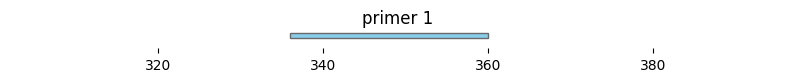

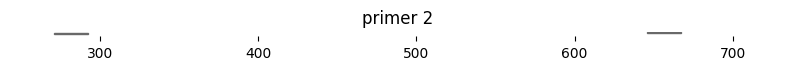

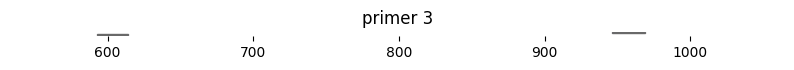

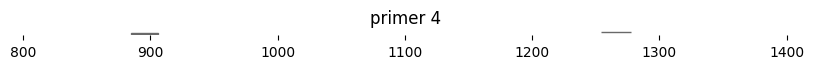

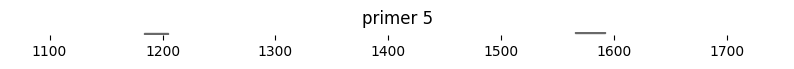

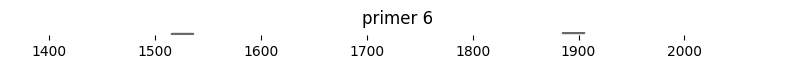

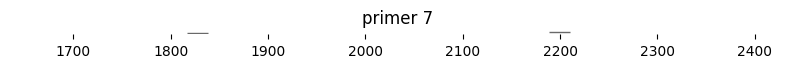

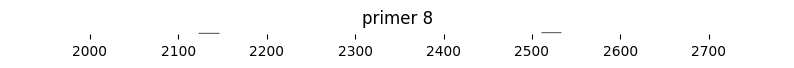

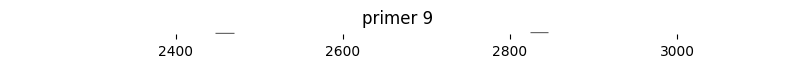

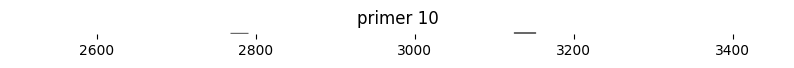

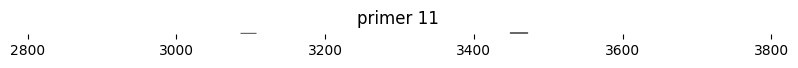

In [ ]:
import itertools

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import bioframe as bf
import bioframe.vis

#df_primer_bf = df_primer[df_primer['genoma_ref'] == 'ON874956.1 ']
df_join['end'] = df_join['Start'] - df_join['l_Start']
df_join['start'] = 0
#df_primer_bf = df_primer_bf.rename(columns={'primer': 'chrom', 'Start': 'start', 'End': 'end'})
df_primer_bf['chrom'] = '1'
#df_primer_bf = df_primer_bf[['chrom', 'start', 'end', 'nome_primer']]

for i in range(99):
  p = df_primer_bf[df_primer_bf['chrom'] == i].sort_values(by='nome_primer')
  if p.size > 0:
    all_values = list(p['start'].values) + list(p['end'].values)
    xmin = min(all_values)
    xmax = max(all_values)

    bf.vis.plot_intervals(p, show_coords=True, xlim=(int(0.9*xmin), int(1.1*xmax)), figsize=(10,1), levels=[1, 2])
    plt.title(f'primer {i}')
    print('____________________________')
    if i > 10:
      break

In [ ]:
df

,Name,Inicio,Fim,Length
0,ORF1a,266,13483,13217
1,ORF1ab,13483,21555,8072
2,SPIKE,21563,25384,3821
3,ORF3a,25393,26220,827
4,ORF4,26245,26472,227
5,ORF 5,26523,27191,668
6,ORF 6,27202,27387,185
7,ORF 7a,27394,27759,365
8,ORF 7b,27756,27887,131
9,ORF 8,27894,28262,368


In [ ]:
ls = []
rs = []
for i in range(1, 99):
  r = df_primer[(df_primer['primer'] == i) & (df_primer['nome_primer'] == 'RIGHT')]
  l = df_primer[(df_primer['primer'] == i) & (df_primer['nome_primer'] == 'LEFT')]

  if r.size > 0:
    rs.append(r[['Start', 'End']].values)
  else:
    rs.append(None)

  if l.size > 0:
    ls.append(l[['Start', 'End']].values)
  else:
    ls.append(None)


In [ ]:
df

,Name,Inicio,Fim,Length
0,ORF1a,266,13483,13217
1,ORF1ab,13483,21555,8072
2,SPIKE,21563,25384,3821
3,ORF3a,25393,26220,827
4,ORF4,26245,26472,227
5,ORF 5,26523,27191,668
6,ORF 6,27202,27387,185
7,ORF 7a,27394,27759,365
8,ORF 7b,27756,27887,131
9,ORF 8,27894,28262,368


['yellow', 'blue', 'red', 'green', 'purple', 'brown', 'pink', 'black', 'salmon', 'violet', 'gray', 'c']
0.8806459241241851
44.63815411641499
---
44.63815411641499
71.36211614472484
---
71.38860173642783
84.03878247356508
---
84.06857876423094
86.8065268065268
---
86.88929428059863
87.64082294517077
---
87.80966859227729
90.02121549947637
---
90.05763318806797
90.67011249619945
---
90.69328738893957
91.90169251038816
---
91.89176041349954
92.3254619776359
---
92.348636870376
93.56697408871322
---
93.6298773690078
97.79804736326476
---
97.88081483733659
98.26485591702983
---


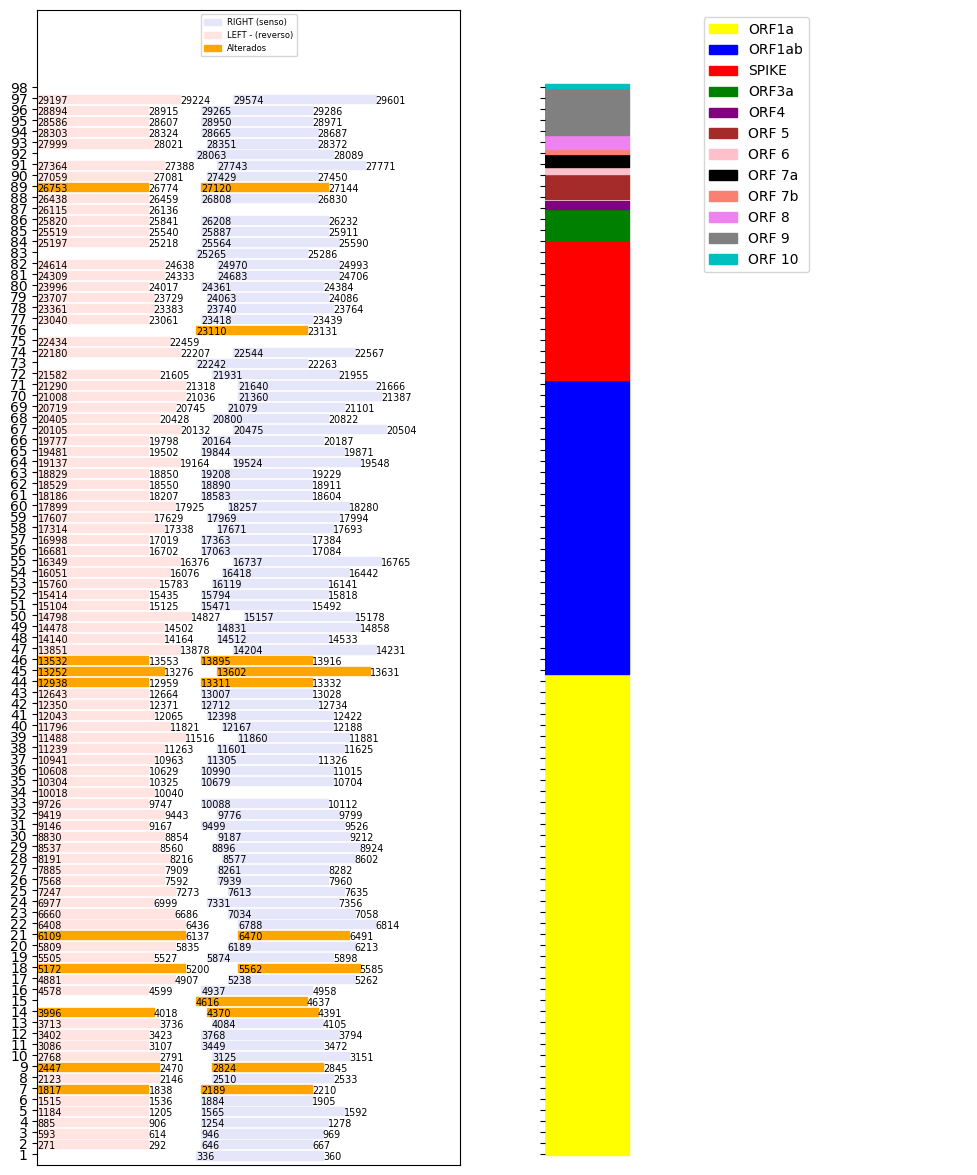

In [ ]:
import random

random.seed(43)
fig, axs = plt.subplots(1, 2, figsize=(12,15), sharey='row')
#for idx, orf in df.iloc[:, :].iterrows():
#  axs[0].broken_barh([(orf['Inicio'], orf['Fim'] - orf['Inicio'])], (0, 1), color=random.choice(list(matplotlib.colors.CSS4_COLORS.values())))
#  ticks = []

idx = 0
limit=5
legend_color = {'mistyrose': False, 'lavender': False, 'orange': False}

for _l, _r in zip(ls, rs):
  idx += 1
  bars = []

  color = ['orange', 'orange'] if idx in (7, 9, 14, 15, 18, 21, 44, 45, 46, 76, 89) else ['mistyrose', 'lavender']

  legend = {'mistyrose': 'LEFT - (reverso)', 'lavender': 'RIGHT (senso)', 'orange': 'Alterados'}

  if _l is not None:
    l = _l[0]
    bars.append((0, l[0] - l[1]))
    axs[0].text(0, idx - 0.5, str(l[1]), fontsize='x-small')
    axs[0].text(l[0] - l[1], idx - 0.5, str(l[0]), fontsize='x-small')

    label = '_' if legend_color[color[0]] else legend[color[0]]
    legend_color[color[0]] = True

    axs[0].broken_barh([(0, l[0] - l[1])], (idx-0.5, 0.75), color=color[0], label=label)
  else:
    l = [20, 0]
    #color = color[1:]

  if _r is not None:
    r = _r[0]
    bars.append((l[0] - l[1] + thr, r[1] - r[0]))
    axs[0].text(l[0] - l[1] + thr, idx - 0.5, str(r[0]), fontsize='x-small')
    axs[0].text(l[0] - l[1] + r[1] - r[0] + thr, idx - 0.5, str(r[1]), fontsize='x-small')

    label = '_' if legend_color[color[1]] else legend[color[1]]
    legend_color[color[1]] = True

    axs[0].broken_barh([(l[0] - l[1] + thr, r[1] - r[0])], (idx-0.5, 0.75), color=color[1], label=label)

  thr = 10

  #axs.broken_barh(bars, (idx-0.5, 0.75), color=color)

  #plt.text(primer['Start'], i, i)

#_ = axs[0].get_yaxis().set_ticks([])
_ = axs[0].set_yticks(range(1, 99))
_ = axs[0].set_xticks([])
#_ = plt.setp(axs.get_xticklabels(), rotation=80, horizontalalignment='right')
axs[0].legend(prop={'size': 6}, loc='upper center')
#_ = axs[1].set_xticklabels(df_primer['start_end'])
_ = axs[1].set_ylim(0, 105)
_ = axs[0].set_xlim(0, 80)

max_pos = 29601
min_pos = 0
colors = (['yellow', 'blue', 'red', 'green', 'purple', 'brown', 'pink', 'black', 'salmon', 'violet', 'gray', 'c'] * 10)[:12]
print(colors)
for idx, row in df.iterrows():
    start = ((row['Inicio'] - min_pos)/(max_pos - min_pos))*98
    end = ((row['Fim'] - min_pos)/(max_pos - min_pos))*98
    print(start)
    print(end)
    print('---')
    axs[1].broken_barh([(0, 1)], (start, end - start), color=colors[idx], label=df['Name'].values[idx])
    axs[1].set_xlim(0, 5)
    axs[1].set_xticks([])
    axs[1].legend(loc='upper center')
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['bottom'].set_visible(False)
    axs[1].spines['left'].set_visible(False)

In [ ]:
df['Name'].values

array(['ORF1a', 'ORF1ab', 'SPIKE', 'ORF3a', 'ORF4', 'ORF 5', 'ORF 6',
       'ORF 7a', 'ORF 7b', 'ORF 8', 'ORF 9', 'ORF 10'], dtype=object)

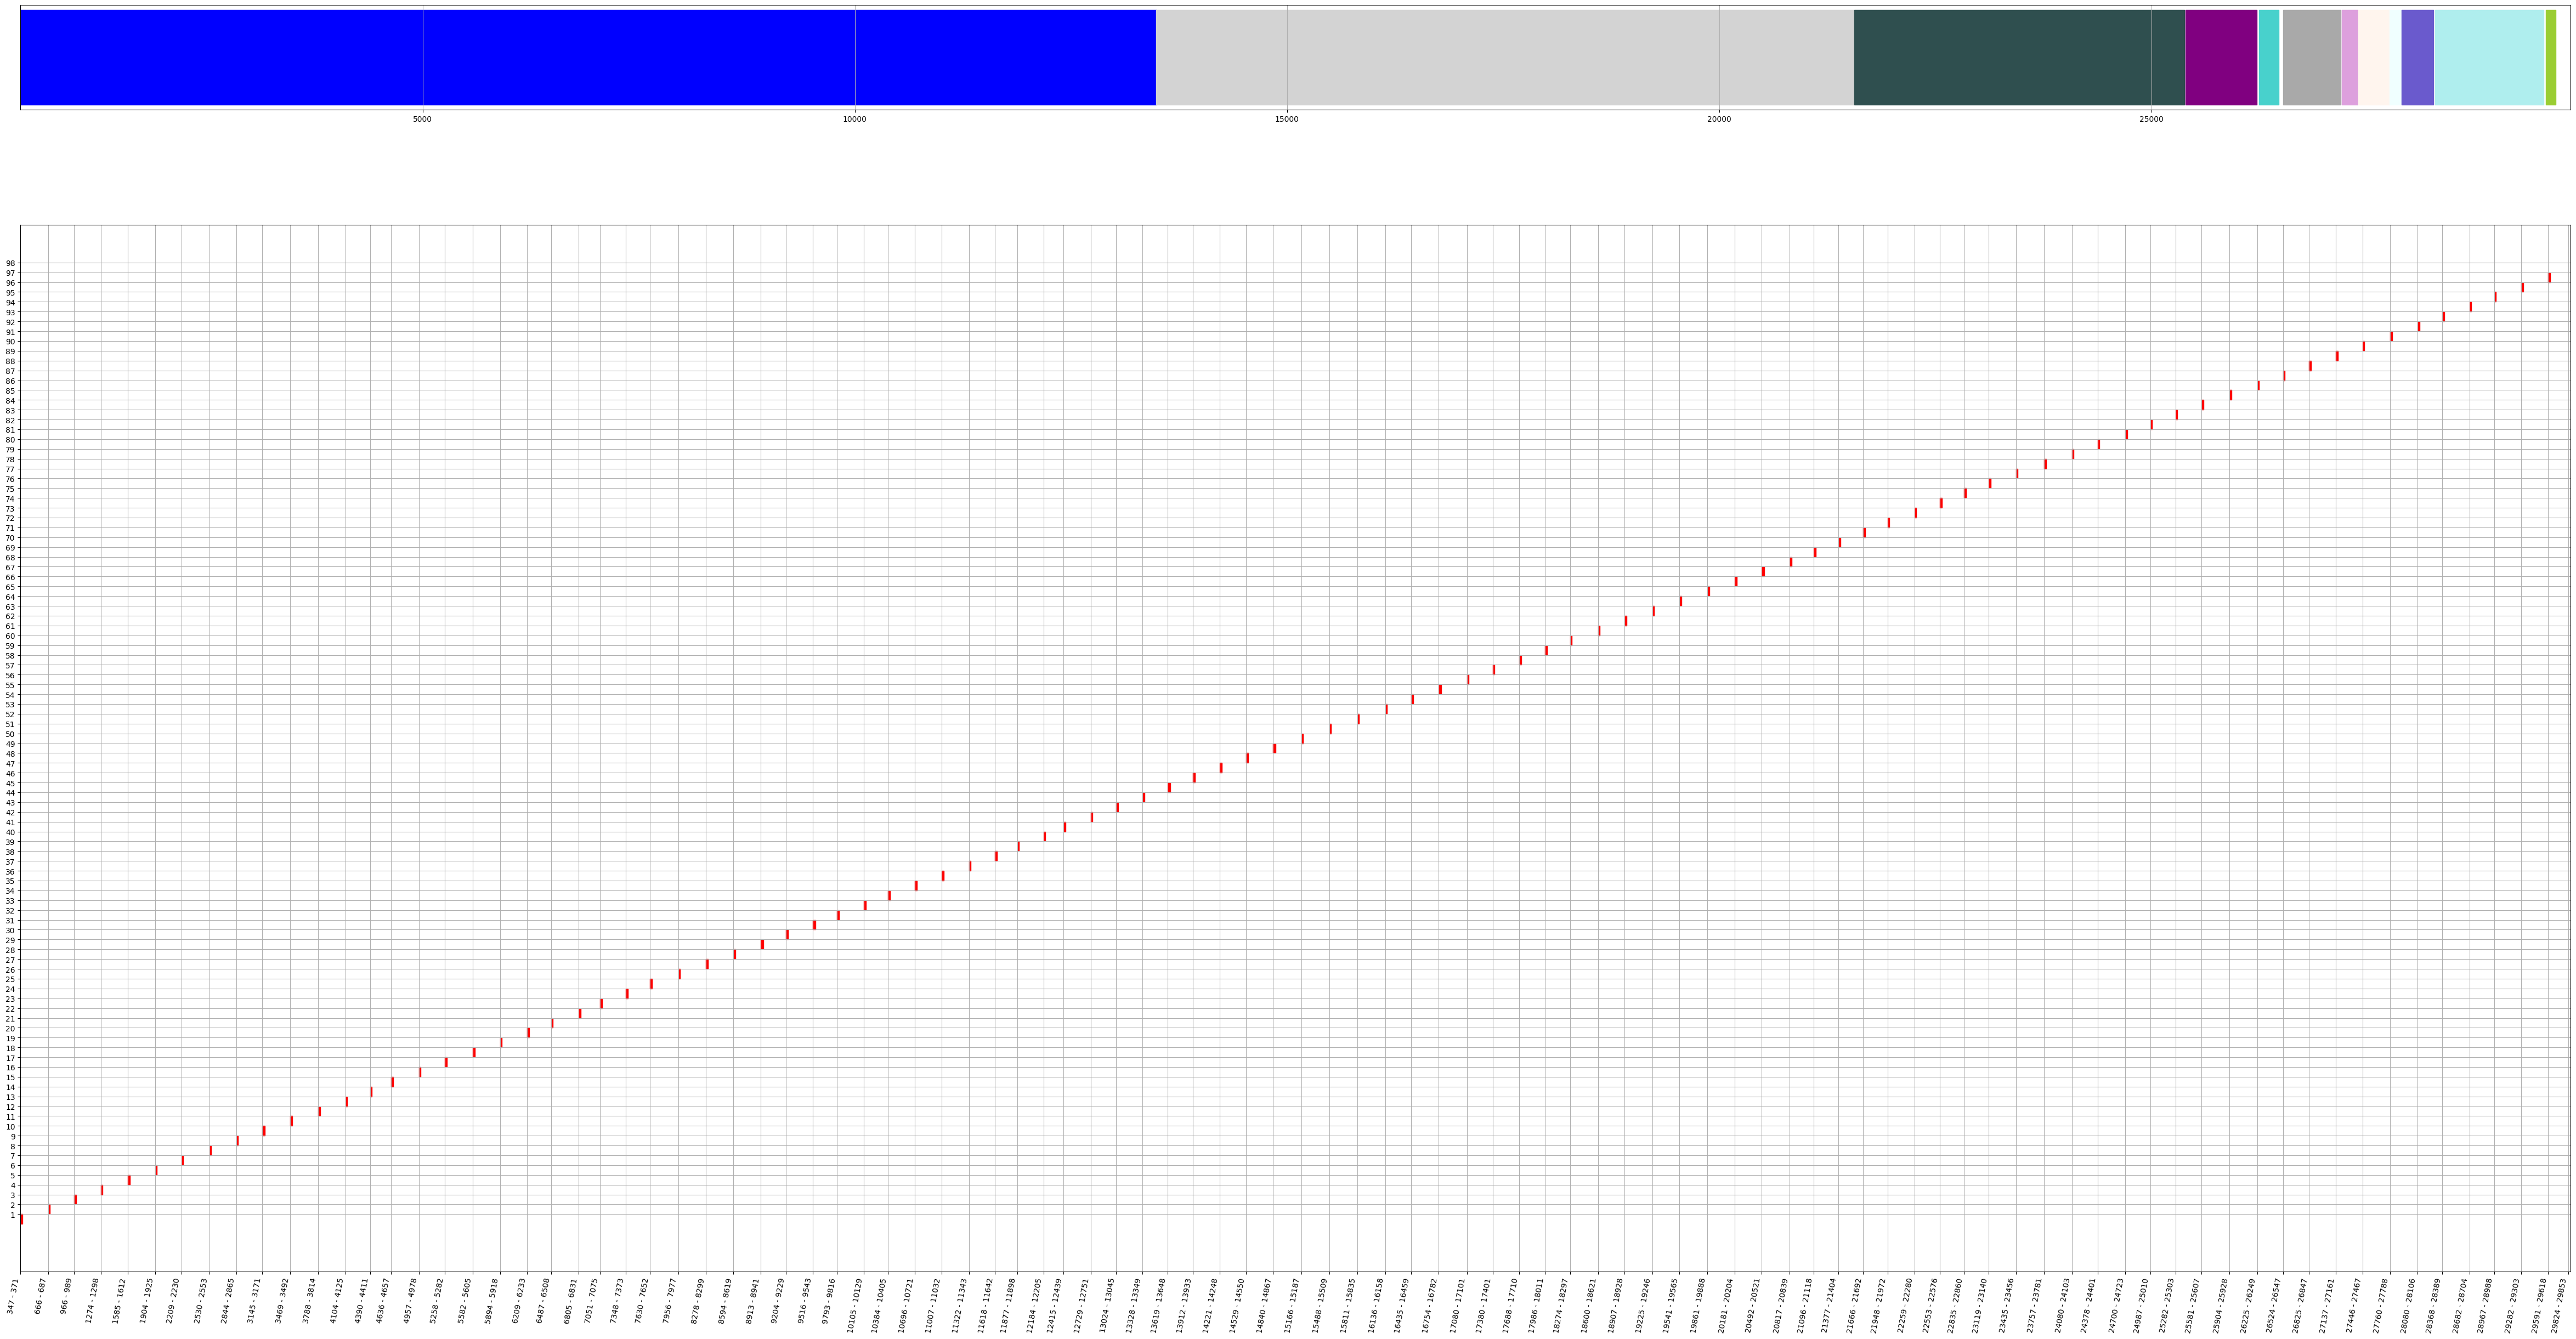

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np

random.seed(43)
fig, axs = plt.subplots(2, 1, figsize=(60, 30), gridspec_kw={'height_ratios': [1, 10]})
for idx, orf in df.iloc[:, :].iterrows():
  axs[0].broken_barh([(orf['Inicio'], orf['Fim'] - orf['Inicio'])], (0, 1), color=random.choice(list(matplotlib.colors.CSS4_COLORS.values())))
  ticks = []
  for i, primer in df_primer.iterrows():
    if (primer['Start'] in range(orf['Inicio'], orf['Fim'] + 1)) or (primer['End'] in range(orf['Inicio'], orf['Fim'] + 1)):
      axs[1].broken_barh([(primer['Start'], primer['End'] - primer['Start'])], (i, 1), color='red')
      ticks.append(primer['Start'])
      #plt.text(primer['Start'], i, i)
axs[0].grid()
axs[1].grid()
_ = axs[0].get_yaxis().set_ticks([])
_ = axs[1].set_yticks(range(1, 99))
_ = plt.setp(axs[1].get_xticklabels(), rotation=80, horizontalalignment='right')
_ = axs[1].set_xticks(df_primer['Start'])
_ = axs[1].set_xticklabels(df_primer['start_end'])
_ = axs[1].set_xlim(347, 29853)
_ = axs[0].set_xlim(347, 29853)

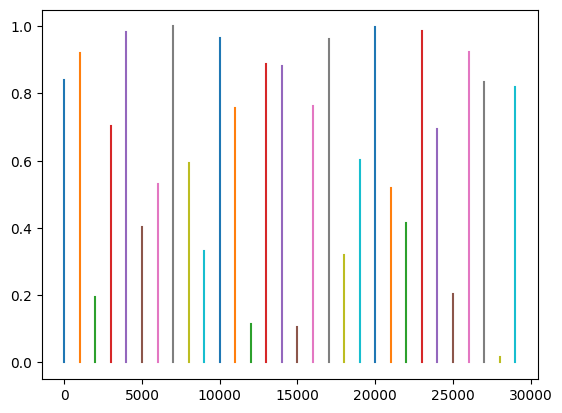

In [ ]:
a = np.arange(1, 30001, 1000)
for idx, v in enumerate(a):
  plt.plot([v, v], [0, abs(np.sin(v))])

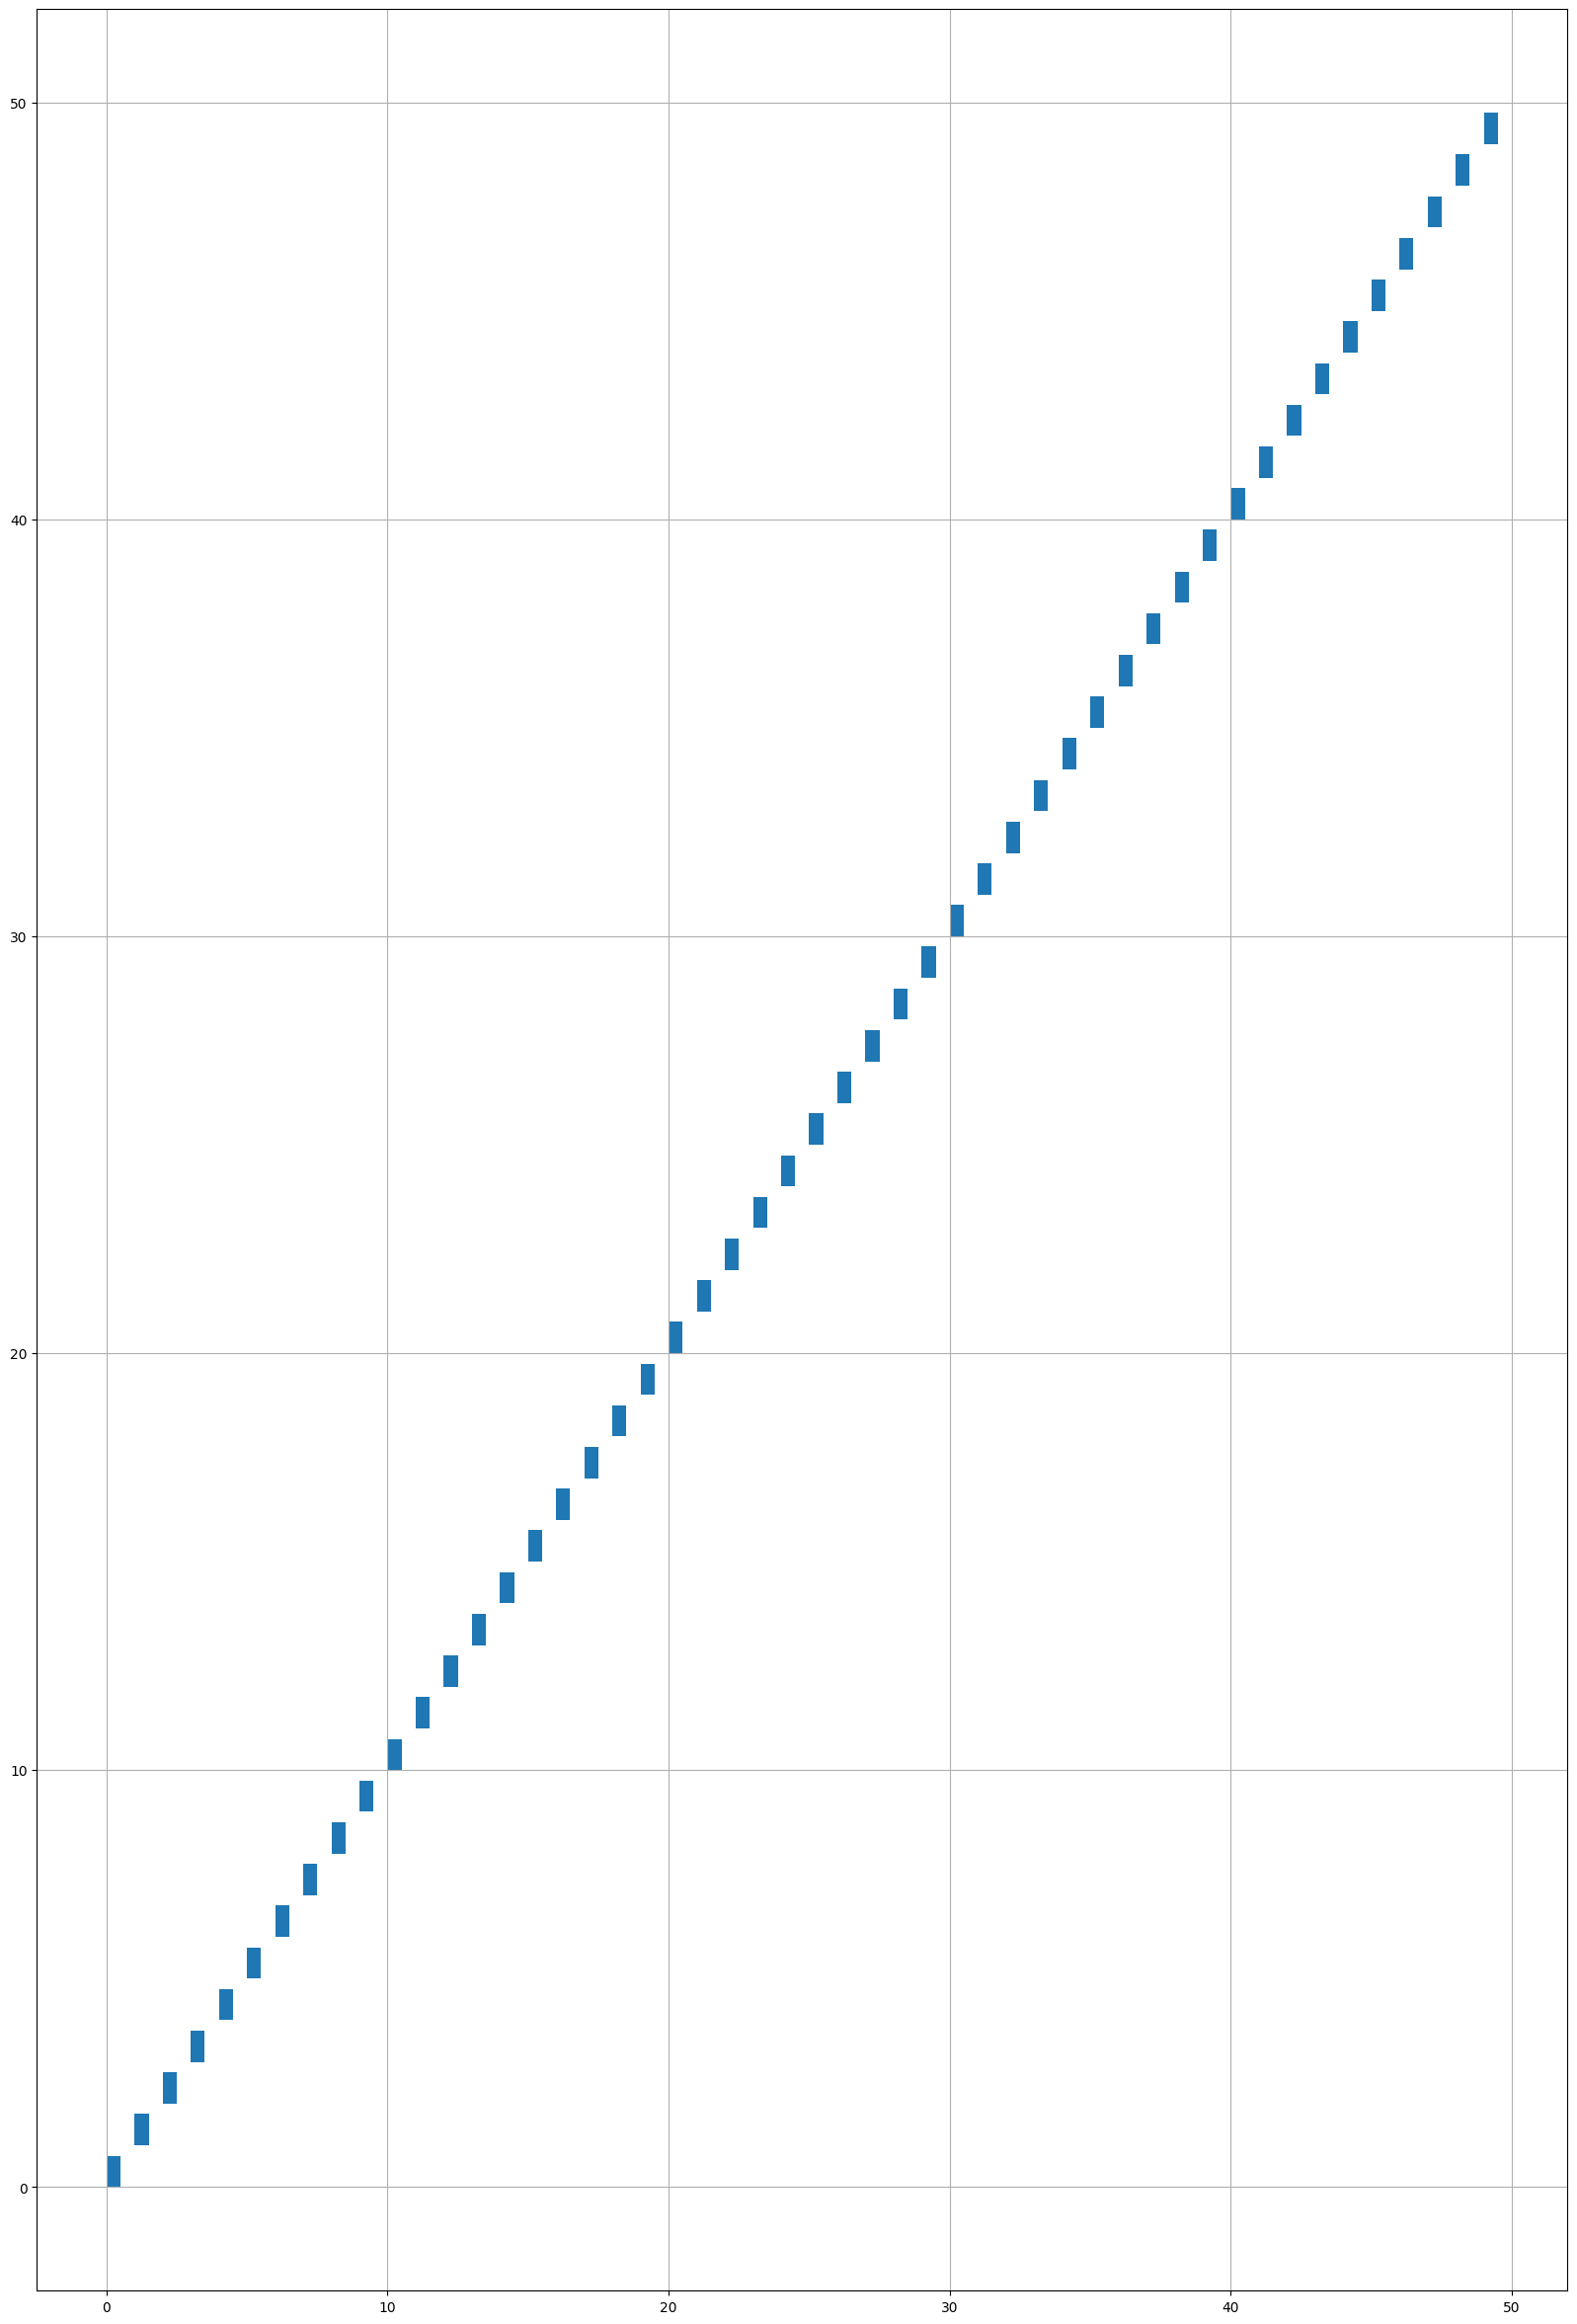

In [ ]:
import numpy as np

plt.figure(figsize=(20, 30))
for i in range(50):
  plt.broken_barh([(i, 0.5)], (i, 0.75))
plt.grid()

In [ ]:
genome = pd.read_csv('Orfsars.csv')

genome['Inicio']


0       266
1     13483
2     21563
3     25393
4     26245
5     26523
6     27202
7     27394
8     27756
9     27894
10    28281
11    29565
Name: Inicio, dtype: int64

In [ ]:
#abrindo e lendo o arquivo csv
genome = pd.read_csv('Orfsars.csv')
primers = pd.read_csv('Prim_coordfilter.csv')
orfs = genome.index.to_list()
genome["Length"] = genome["End"] - genome["Start"] + 1

test = np.arange(1, 30001, 1000)

s_factor = 999/1000

fig, (ax0, ax1) = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [1, 8]}, figsize=(8, 6))

# Gráfico principal
for idx, value in enumerate(test):
    ax1.plot([value, value], [0, np.abs(np.sin(value))], color='red', lw=2)
ax1.set_xlabel("Coordenadas")
ax1.set_ylabel("Primers")
ax1.set_xticks(np.arange(0, 30001, 2000))
ax1.set_xticklabels(np.arange(266, 29903, ))
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

# Barra superior do gráfico
genome_starts = genome["Start"].values * s_factor
genome_lengths = genome["Length"].values * s_factor
colors = plt.cm.rainbow(np.linspace(0, 1, len(genome)))
for start, length, color in zip(genome_starts, genome_lengths, colors):
    ax0.axhspan(0, 1, facecolor=color, xmin=start/30000, xmax=(start+length)/30000)
ax0.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Dataset
primer = [0,99,1]
coordenadas =

01 de NOVEMBRO DE 2023

* Utilizando Bioframe (Pandas)

**Montagem e estrutura do** **mapa**

In [ ]:
# Fazer a conexão de ambos os sentindos dos primers. Left() and Right (), UTILIZANDO O bIOFRAME